<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%202%20Review%20of%20Rock%20and%20Fluid%20Properties/notebook/2_practices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 2. Review of Rock and Fluid Properties (Practice Problems)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 48 (delta 19), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (48/48), done.


# Example 2.2 Relative Permeability Calculations from Steady-State Tests

In [21]:
flowrate = pd.read_csv('/content/reservoir-engineering/Unit 2 Review of Rock and Fluid Properties/data/Table 2.2-Flow Rates for Example 2.2.csv')
flowrate

,Sw,qo,qw
0,0.00,0.0600,0.000
1,0.20,0.0420,0.000
2,0.30,0.0300,0.010
3,0.40,0.0200,0.020
4,0.50,0.0130,0.035
5,0.60,0.0075,0.051
6,0.70,0.0040,0.068
7,0.80,0.0010,0.085
8,0.85,0.0000,0.096
9,1.00,0.0000,0.250


Text(0.5, 1.0, 'Flow Rates')

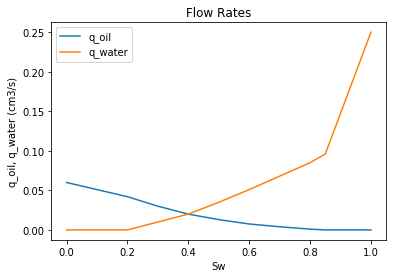

In [22]:
# plot data
p1 = plt.plot(flowrate.Sw, flowrate.qo)
p2 = plt.plot(flowrate.Sw, flowrate.qw)
plt.xlabel("Sw"); plt.ylabel("q_oil, q_water (cm3/s)")
plt.legend((p1[0], p2[0]), ('q_oil', 'q_water'))
plt.title("Flow Rates")

Text(0.5, 1.0, 'Relative Permeabilities')

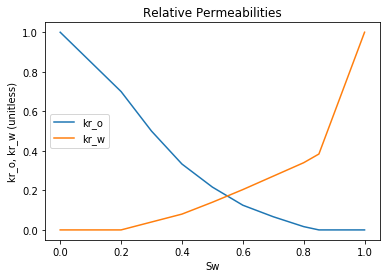

In [23]:
# Question 1. calculate relative permeabilities of oil and water
kr_o = flowrate.qo / flowrate.qo[0] #qo per q0 at Sw=0
kr_w = flowrate.qw / flowrate.qw[9] #qw per qw at Sw=1

# plot result
p1 = plt.plot(flowrate.Sw, kr_o)
p2 = plt.plot(flowrate.Sw, kr_w)
plt.xlabel("Sw"); plt.ylabel("kr_o, kr_w (unitless)")
plt.legend((p1[0], p2[0]), ('kr_o', 'kr_w'))
plt.title("Relative Permeabilities")

Text(0.5, 1.0, 'Phase Permeabilities')

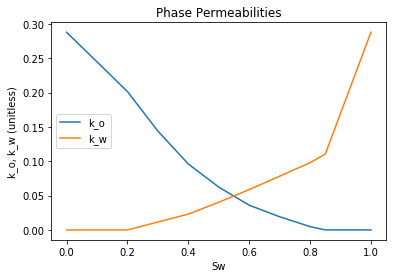

In [27]:
# Question 2. calculate the phase permeabilities of oil and water

#known
mu_oil = 5 #oil viscosity, cP
mu_water = 1.2 #water viscosity, cP
core_length = 12 #cm
dP = -2.5 #negative because of pressure drop, atm
core_area = 5 #cm2

# so in this case, Darcy units are used (refer to Table 2.1), the unit of k will be in Darcy 
# use q = -k*A/mu*dp/dx, negative sign because pressure drop

k_o = -(flowrate.qo * mu_oil / core_area) / (dP / core_length)
k_w = -(flowrate.qw * mu_water / core_area) / (dP / core_length)

# plot result
p1 = plt.plot(flowrate.Sw, k_o)
p2 = plt.plot(flowrate.Sw, k_w)
plt.xlabel("Sw"); plt.ylabel("k_o, k_w (unitless)")
plt.legend((p1[0], p2[0]), ('k_o', 'k_w'))
plt.title("Phase Permeabilities")

# Example 2.3 Calculation of Leverett J Function (Capillary Pressure)

In [31]:
# Question. calculate Leverett J function for different sets of core

# known
sigma = 72 # interfacial tension, in dyne/cm
theta = 45 # angle of wettability

# data: four sets of core from same reservoir, each has k and porosity (Table 2.5)
# capillary pressure in psi
capilar = pd.read_csv('/content/reservoir-engineering/Unit 2 Review of Rock and Fluid Properties/data/Table 2.3-Capillary Pressure Sets for Example 2.3.csv')
capilar.head()

# Pc_1: capillary pressure of core 1, at 1 md and poro 0.08
# Pc_2: capillary pressure of core 2, at 15 md and poro 0.11
# Pc_3: capillary pressure of core 3, at 100 md and poro 0.15
# Pc_4: capillary pressure of core 4, at 500 md and poro 0.22

,sw,Pc_1,Pc_2,Pc_3,Pc_4
0,15.0,93.59,28.34,12.82,6.94
1,16.0,66.48,20.13,9.10,4.93
2,17.0,46.54,14.09,6.37,3.45
3,18.0,39.89,12.08,5.46,2.96
4,19.0,33.24,10.06,4.55,2.47


In [0]:
"units are not coherent, convert units to psi, cm2"

sigma = 72 * (1/68947.57) # from dyne/cm convert to psi/cm, 1 psi = 68947.57 dyne/cm2

# Pc in data is already in psi, correct.

# permeability must be in unit cm2 to match with sigma dyne/cm
k_1 = (1 / 1000) * (0.98689233 * 1E-08) # permeability of core 1, 1 darcy = 100 md = 0.98689233 micro.m2 = ... * 1E-08 cm2
k_2 = (15 / 1000) * (0.98689233 * 1E-08)
k_3 = (100 / 1000) * (0.98689233 * 1E-08)
k_4 = (500 / 1000) * (0.98689233 * 1E-08)

poro_1 = 0.08 # porosity of core 1
poro_2 = 0.11
poro_3 = 0.15
poro_4 = 0.22

In [95]:
J_1 = (capilar.Pc_1 / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k_1 / poro_1)
J_2 = (capilar.Pc_2 / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k_2 / poro_2)
J_3 = (capilar.Pc_3 / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k_3 / poro_3)
J_4 = (capilar.Pc_4 / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k_4 / poro_4)
J = pd.DataFrame({"Sw":capilar.sw, "Leverett_1":J_1, "Leverett_2":J_2, "Leverett_3":J_3, "Leverett_4":J_4})
J.head()

,Sw,Leverett_1,Leverett_2,Leverett_3,Leverett_4
0,15.0,1.407735,1.407944,1.408247,1.407568
1,16.0,0.999959,1.000068,0.999614,0.999901
2,17.0,0.700032,0.699998,0.699729,0.699728
3,18.0,0.600006,0.600140,0.599768,0.600346
4,19.0,0.499980,0.499785,0.499807,0.500965


Text(0.5, 1.0, 'Leverett J-Function')

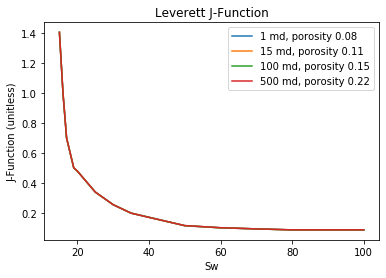

In [99]:
# plot Leverett function result
p1 = plt.plot(J[['Sw']], J[['Leverett_1']])
p2 = plt.plot(J[['Sw']], J[['Leverett_2']])
p3 = plt.plot(J[['Sw']], J[['Leverett_3']])
p4 = plt.plot(J[['Sw']], J[['Leverett_4']])
plt.xlabel("Sw"); plt.ylabel("J-Function (unitless)")
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('1 md, porosity 0.08', '15 md, porosity 0.11', '100 md, porosity 0.15', '500 md, porosity 0.22'))
plt.title("Leverett J-Function")

# Example 2.4 Calculation of Z Factor for Sour Gas

In [149]:
# Question. calculate z factor for the sour gas
# known
pressure = 2010 # in psia
temp = 75 # in deg F
sg = 0.7 # specific gravity
x_h2s = 0.07 # mole fraction
x_co2 = 0.1

temp = temp + 459.67 # convert to Rankine

# calculate pseudocritical properties (Sutton, valid for 0.57<sg<1.68)
P_pc = 756.8 - (131.07 * sg) - (3.6 * sg**2)
T_pc = 169.2 + (349.50 * sg) - (74 * sg**2) # in Rankine

# calculate adjustment to pseudocritical properties for sour gas (Wiechert-Aziz, valid for x_co2<0.544 and x_h2s<0.738)
e = (120 * (((x_h2s + x_co2)**0.9) - ((x_h2s + x_co2)**1.6))) + (15 * (x_h2s**0.5 - x_h2s**4))
T_pc_corr = T_pc - e # corrected T_pc
P_pc_corr = (P_pc * T_pc_corr) / (T_pc - x_h2s * e * (1-x_h2s))

# calculate pseudoreduced properties
P_pr = pressure / P_pc_corr
T_pr = temp / T_pc_corr
print(P_pr, T_pr)

3.1995450990234966 1.5005661019949397


And then, insert the T_pr and P_pr to find the z factor from Standing-Katz graph

![Standing-Katz EOS](https://petrowiki.org/images/thumb/7/76/Vol1_Page_225_Image_0001.png/708px-Vol1_Page_225_Image_0001.png)